<a href="https://colab.research.google.com/github/Michael-Holland-Dev/CS180/blob/main/data_science_labs/data_science_lab_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BYU CS 180 Lab 8

## Introduction:
For this assignment, you will build a simple univariate linear regression model to predict profits for a food truck.

Download the data that you will use by running this command, and read it in using:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

!curl -o food-truck.csv https://raw.githubusercontent.com/porterjenkins/cs180-intro-data-science/master/data/food-truck.csv
data = pd.read_csv("food-truck.csv", header=None, names=['X', 'Y'])

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1359  100  1359    0     0   5708      0 --:--:-- --:--:-- --:--:--  5710


In [2]:
data

,X,Y
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


We will restrict ourselves to a linear hypothesis space, constructing a model that adheres to the following form:
$$ f _\Theta(x) = \theta _0 + \theta _1x $$

You might notice that this equation is similar to the linear equation: $$ f(x) = b + mx $$

(Yes you did use y=mx+b after 8th grade 😜)


In this lab, you will be writing a machine learning model that learns/approximates 2 parameters. The first one is $\theta_0$ which represents learning *b* (the bias or the intercept). The second one is $\theta_1$ which represents learning *m* (the weight, or the slope). This type of machine learning model is traditionally called Least Squares model.

Given data, your goal will be to estimate the parameters of this model using the method of steepest gradient descent. The parameters are defined within the construct:
$$ \theta_p = \{\theta_0,\theta_1\} $$

which is the vector of learnable coefficients that weight the observed variables, and where $\theta_1$ is a single bias coefficient. We can learn these parameters by minimizing average squared error. Thus, the loss function you will want to implement is:

Equation 1: $$ L(\Theta) = \frac{1}{2m}\sum_{i=1}^m (f(x^i)-y^i)^2 $$

This equation may look very scary at first, but it's really not that scary, so let's break it down, and define our variables.
*   m is the number of datapoints in the data set.
*   i is the index of the data point tuple that we're looking at in the sum.
*   L is the loss function (think of it like f(x)).
*   $\Theta$ is the list of parameters to estimate.
*   $(f(x^i)-y^i)^2$ is the squared difference between the predicted output and the actual output.

So wrapping it all together, the loss function is taking the sum of the squared differences, and dividing it by double the number of datapoints in the dataset.

The goal of this lab is to minimize the loss function, because that means that our predicted values and the actual values are getting closer together. (Quick thought exercise, ask yourself why we want our predicted values to get closer to the actual values)



## Exercise 1: The Dark Descent (Compute Loss)

In order to correctly recreate the gradient descent algorithm, you need to compute the loss function. Use the equation for loss given in the introduction to fill out the functions below to correctly produce the right loss.

In [3]:
def predict(X, theta):
  # TODO: Write the code to output the predicted y values based on the X values
  # Hint: Remember that theta is a tuple consisting of theta_0 and theta_1
  y_predictions = theta[0] + theta[1]*X
  return y_predictions

def sum_mean_squared_error(y, y_hat):
  # TODO: Write the sum of the mean squared error
  # Hint: Follow the loss equation
  mean_squared_error = np.sum([(y[i] - y_hat[i])**2 for i in range(len(y))])/(len(y))
  return mean_squared_error

def calculate_loss(X, y, theta):
  # TODO: Write your compute loss function below
  # Hint: You'll use the predict and the sum_mean_squared_error functions defined above
  y_hat = predict(X, theta)
  loss = sum_mean_squared_error(y,y_hat)/2
  return loss



Explain to me like I'm five what the code above is doing:

I'm just figuring out the best paramteres

## Exercise 2: Partial Derivatives

Analytically derive the gradient of the loss function with respect to the model parameters, $\theta_0$ and $\theta_1$. (take the partial derivative with respect to the given parameters)

Hint: You will need to find these two derivatives in order to calculate the gradient (L is just a less fancy version of the L(θ) above):



Give the partial derivative for the parameter $\theta_0$ below:

$\sum$(($\theta_{0}-\theta_{1}X)$-y)*($\frac{1}{m}$)

Give the partial derivative for the parameter $\theta_1$ below:

$\sum$(($\theta_{0}-\theta_{1}X)$-y)$X$*($\frac{1}{m}$)

Using the two equations above, fill out the gradient calculation function below:

In [29]:
def calculate_gradient(X,y, theta):
  # TODO: The gradient with respect to the bias (the y intercept)
  dL_d0 = np.sum(predict(X,theta)-y)/len(y)
  # TODO: The gradient with respect to the weight (the slope)
  dL_d1 = np.sum((predict(X,theta)-y)*X)/len(y)
  
  # nabla represents the full gradient, or a vector of the partial derivatives
  nabla = (dL_d0, dL_d1)
  return nabla

## Exercise 3: Hold The Line (Training Your Least Squared Algorithm)

### There are a couple of hyperparameters that you should know about before training your algorithm:

#### Epochs / Iterations:
Epochs is the number of times that the algorithm runs through the dataset. For example, if the epoch count is 500, then the algorithm with iterate through the dataset 500 times.

#### Learning Rate / Step Size:
Learning rate (traditionally denoted as α or alpha) is the rate at which your algorithm learns. You can also think of it as the step size for updating the weight and bias ($\theta_0$ and $\theta_1$). If the step size is too large, the loss value will blow up and never converge. If the learning rate is too small, the algorithm will take forever to converge, and won't be an efficient use of your time. If you have a smaller learning rate, I recommend using a higher epoch count.

#### Batch Size:
You won't use batch size for this lab, but I still feel like it's an important concept to learn. Batch size is splitting the dataset up into smaller chunks and then feeding those smaller chuncks of data into the ML model. When it comes to larger models such as Neural Networks, it's important to have the right batch size otherwise your computer may run out of memory.





### Now that you understand the hyperparameters, let's train our model!

You will update the current value for each theta with the function:

Equation 2:
$$\theta_n = \theta_p - α \frac{dL(\Theta)}{d\theta_p}$$

Again, there are some scary letters, but that's not to worry, I'm going to break them down for you below.

* $\theta_n$ is the updated parameter tuple.
* $\theta_p$ is the previous parameter tuple.
* α is the learning rate. (I recommend a small value for this, like 0.1, 0.01, or 0.001. Once the lab is finished you should try different values for your learning rate and see how it changes the convergence of the parameters).
* $\frac{dL(\Theta)}{d\theta_p}$ is the gradient (vector of partial derviatives) that you'll be updating.

Putting it all together, we have the previous parameters being subtracted from the gradient multiplied by a learning rate.

Attempt to explain why/how this function uses the loss function minimize the parameters. (Credit will be given at an attempt of an explanation, not based on correctness):

It takes the derivative of the loss function to minimize the parameters.

Fill out the TODO parts of the training function below:

In [34]:
def train_model(dataframe, epochs, learning_rate):
  # Get the X and y values of the column
  X = dataframe.iloc[:, 0]
  y = dataframe.iloc[:, 1]

  # Turn the X and y values into numpy arrays
  X = np.array(X.values)
  y = np.array(y.values)

  # convert to numpy arrays and initalize the parameter array theta
  w = np.zeros(1)
  b = np.zeros(1)
  theta = (b, w)

  # TODO: calculate the initial loss
  initial_L = calculate_loss(X, y, theta)

  # Initialize the list of loss values
  loss_values = [initial_L]

  # Initialize I to 0
  i = 0

  while i < epochs:
    # TODO: Calculate Gradient
    dL_db, dL_dw = calculate_gradient(X,y,theta)
    t_0 = theta[0]
    t_1 = theta[1]

    # TODO: update theta with respect to the calculated gradient
    # Hint: use the equation above
    updated_t_0 = t_0-(learning_rate*dL_db)
    updated_t_1 = t_1-(learning_rate*dL_dw)

    theta = (updated_t_0, updated_t_1)

    # TODO: Calculated new loss using the updated theta values, and add it to the loss_values list
    L = calculate_loss(X,y,theta)
    loss_values.append(L)

    # Update I
    i += 1
    
  return (loss_values, theta)

In [39]:
def plot_line(dataframe, theta, epoch, learning_rate):
  # This function will plot your model based on some sampled values
  # There is no need to change this function, you'll just need to call it
  
  X = dataframe.iloc[:, 0]
  y = dataframe.iloc[:, 1]

  kludge = 0.25
  X_test = np.linspace(data.X.min(), data.X.max(), 100)
  X_test = np.expand_dims(X_test, axis=1)
  
  plt.plot(X_test, predict(X_test, theta), label="Model")
  plt.title(f"Value for {epoch} epochs and {learning_rate} step")
  plt.scatter(X, y, edgecolor='g', s=20, label="Samples")
  plt.xlabel("x")
  plt.ylabel("y")
  plt.xlim((np.amin(X_test) - kludge, np.amax(X_test) + kludge))
  plt.ylim((np.amin(y) - kludge, np.amax(y) + kludge))
  plt.legend(loc="best")
  plt.show()

Use the two functions above to do plot the models after 5, 100, 1000, and 10,000 epochs.

In [1]:
# Write the code to plot the line for the following cases:
# 5 Epochs
# loss_values, theta = train_model(data, 5, .01)
plot_line(data, theta, 5, .01)
print(data)
print(theta)

# # 100 Epochs
# loss_values, theta = train_model(data, 100, .01)
# plot_line(data, theta, 100, .01)

# # 1000 Epochs
# loss_values, theta = train_model(data, 1000, .01)
# plot_line(data, theta, 1000, .01)

# # 10,000 Epochs
# loss_values, theta = train_model(data, 10000, .01)
# plot_line(data, theta, 10000, .01)


NameError: name 'plot_line' is not defined

Using the results after 10,000 epochs, plot the loss values with respect to epochs using a line graph (epochs on the x axis and loss values on the y axis).

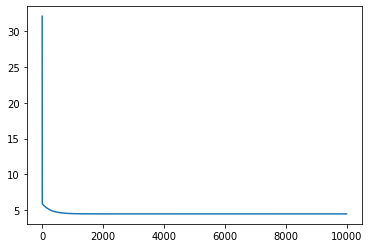

/var/folders/j1/rssdx9h148g0ptj4pj02c_0m0000gn/T/ipykernel_12083/3673399148.py:10: RuntimeWarning: overflow encountered in double_scalars
  mean_squared_error = np.sum([(y[i] - y_hat[i])**2 for i in range(len(y))])/(len(y))
/var/folders/j1/rssdx9h148g0ptj4pj02c_0m0000gn/T/ipykernel_12083/44109283.py:33: RuntimeWarning: invalid value encountered in subtract
  updated_t_1 = t_1-(learning_rate*dL_dw)


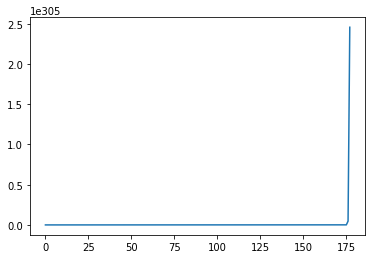

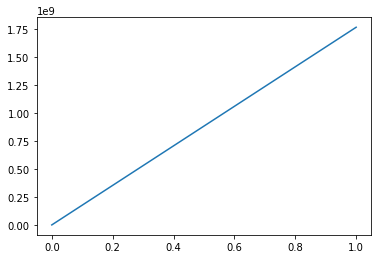

In [45]:
# Write the code to plot the loss values for each of the 10,000 iterations:
plt.plot(train_model(data, 10000, .01)[0])
plt.show()
plt.plot(train_model(data, 10000, .1)[0])
plt.show()
plt.plot(train_model(data, 1, 100)[0])
plt.show()
# If you have a smaller learning rate, I recommend using a higher epoch count.

## Exercise 4: Discussion

Since learning a linear model is a convex optimization problem, you should see the model converge to a low mean squared error. However, you will need to tune the learning rate/step size, α (bear in mind that values that are too big will result in divergence).
Write a few sentences describing what you learned from the training/model fitting process. 

Things to discuss: What happens when you change the step size α? How many epochs did you need to converge on a reasonable solution (for any given step size)?

You should also discuss the hyperparameters you tried, and which ones worked best. 

For some reason, when you change the learning rate smaller, the epoch count gets higher.